# Initialization

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('LendingClub_wi3435TU.csv')


C:\Users\Teo\AppData\Local\Temp\ipykernel_17376\3969421361.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LendingClub_wi3435TU.csv')


In [68]:
print(df.shape)
perc = 25.0 
min_count =  int(((100-perc)/100) * df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)
# print(df.shape)

(217452, 124)


In [69]:
print(df.columns)
print(df['loan_status'].unique())

Index(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_

In [47]:
df_modified = df_modified[df_modified['loan_status'] != 'Late (31-120 days)']
df_modified = df_modified[df_modified['loan_status'] != 'Late (16-30 days)']

In [39]:
# drop all rows that have value of Current and In Grace Period for loan_status column

df_modified = df[df['loan_status'] != 'Current']
df_modified = df_modified[df_modified['loan_status'] != 'In Grace Period']
df_modified['loan_status'] = df_modified['loan_status'].replace('Fully Paid', 1)
df_modified['loan_status'] = df_modified['loan_status'].replace(['Charged Off', 'Default'], 0)
df_modified['loan_status'] = df_modified['loan_status'].astype('int64')
df_modified = df_modified.reindex(sorted(df.columns), axis=1)

In [46]:
print(df.shape)
print(df_modified.shape)
print(df_modified.columns)

(217452, 85)
(149488, 85)
Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util',
       'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
       'debt_settlement_flag', 'delinq_2yrs', 'disbursement_method', 'dti',
       'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high',
       'fico_range_low', 'grade', 'hardship_flag', 'home_ownership', 'id',
       'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m',
       'inq_last_6mths', 'installment', 'int_rate', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt',
       'loan_status', 'max_bal_bc', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_rcnt_il', 'mths_since_recent_bc',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num

In [ ]:
print(df_modified['collections_12_mths_ex_med'].unique())
print(df_modified.head()[['last_credit_pull_d', 'loan_status']])

# Drop the columns that provoke Data Leakage

0     Fully Paid
1     Fully Paid
2     Fully Paid
3    Charged Off
4     Fully Paid
5     Fully Paid
6        Current
7    Charged Off
8        Current
9    Charged Off
Name: loan_status, dtype: object


# Drop columns that have no predictive power

In [ ]:
drop_list = [
    'id',
    'policy_code',
    'url'
]
df_modified.drop(drop_list, axis=1, inplace=True)


In [52]:
print(df_modified.shape)

(149488, 82)


# Drop unbalanced columns

In [61]:
# Compute the value counts for each column in percentages and sort them in descending order, 
for col in df_modified.columns:
    print(col, df_modified[col].value_counts(normalize=True, dropna=False).sort_values(ascending=False))
    print('---------------------------------------------------')


acc_now_delinq 0.0    0.993672
1.0    0.006014
2.0    0.000288
3.0    0.000020
4.0    0.000007
Name: acc_now_delinq, dtype: float64
---------------------------------------------------
acc_open_past_24mths 3.0     0.139884
4.0     0.136185
5.0     0.120692
2.0     0.119762
6.0     0.098657
1.0     0.080254
7.0     0.078026
8.0     0.057389
9.0     0.041555
0.0     0.033361
10.0    0.029119
11.0    0.019634
12.0    0.013680
13.0    0.009218
14.0    0.006770
15.0    0.004589
16.0    0.003097
17.0    0.002161
18.0    0.001692
19.0    0.001077
21.0    0.000789
20.0    0.000783
22.0    0.000475
23.0    0.000314
24.0    0.000181
25.0    0.000134
26.0    0.000127
27.0    0.000100
28.0    0.000067
30.0    0.000040
32.0    0.000033
29.0    0.000027
34.0    0.000027
35.0    0.000020
33.0    0.000013
43.0    0.000013
40.0    0.000013
54.0    0.000007
42.0    0.000007
37.0    0.000007
45.0    0.000007
39.0    0.000007
31.0    0.000007
Name: acc_open_past_24mths, dtype: float64
---------------------

In [63]:
# an example of how to look at some value-counts
for col in df_modified.columns:
    value_counts = df_modified[col].value_counts()
    # transform the value_counts into a percentage
    value_counts = value_counts / value_counts.sum() * 100
    for value in value_counts:
        if value > 95:
            df_modified.drop(col, axis=1, inplace=True)
            break
print(df_modified.shape)

(149488, 73)
(149488, 73)


In [65]:
for col in df.columns:
    if col not in df_modified.columns:
        print(col)

id
url
out_prncp
collections_12_mths_ex_med
policy_code
application_type
acc_now_delinq
chargeoff_within_12_mths
tax_liens
hardship_flag
disbursement_method
debt_settlement_flag


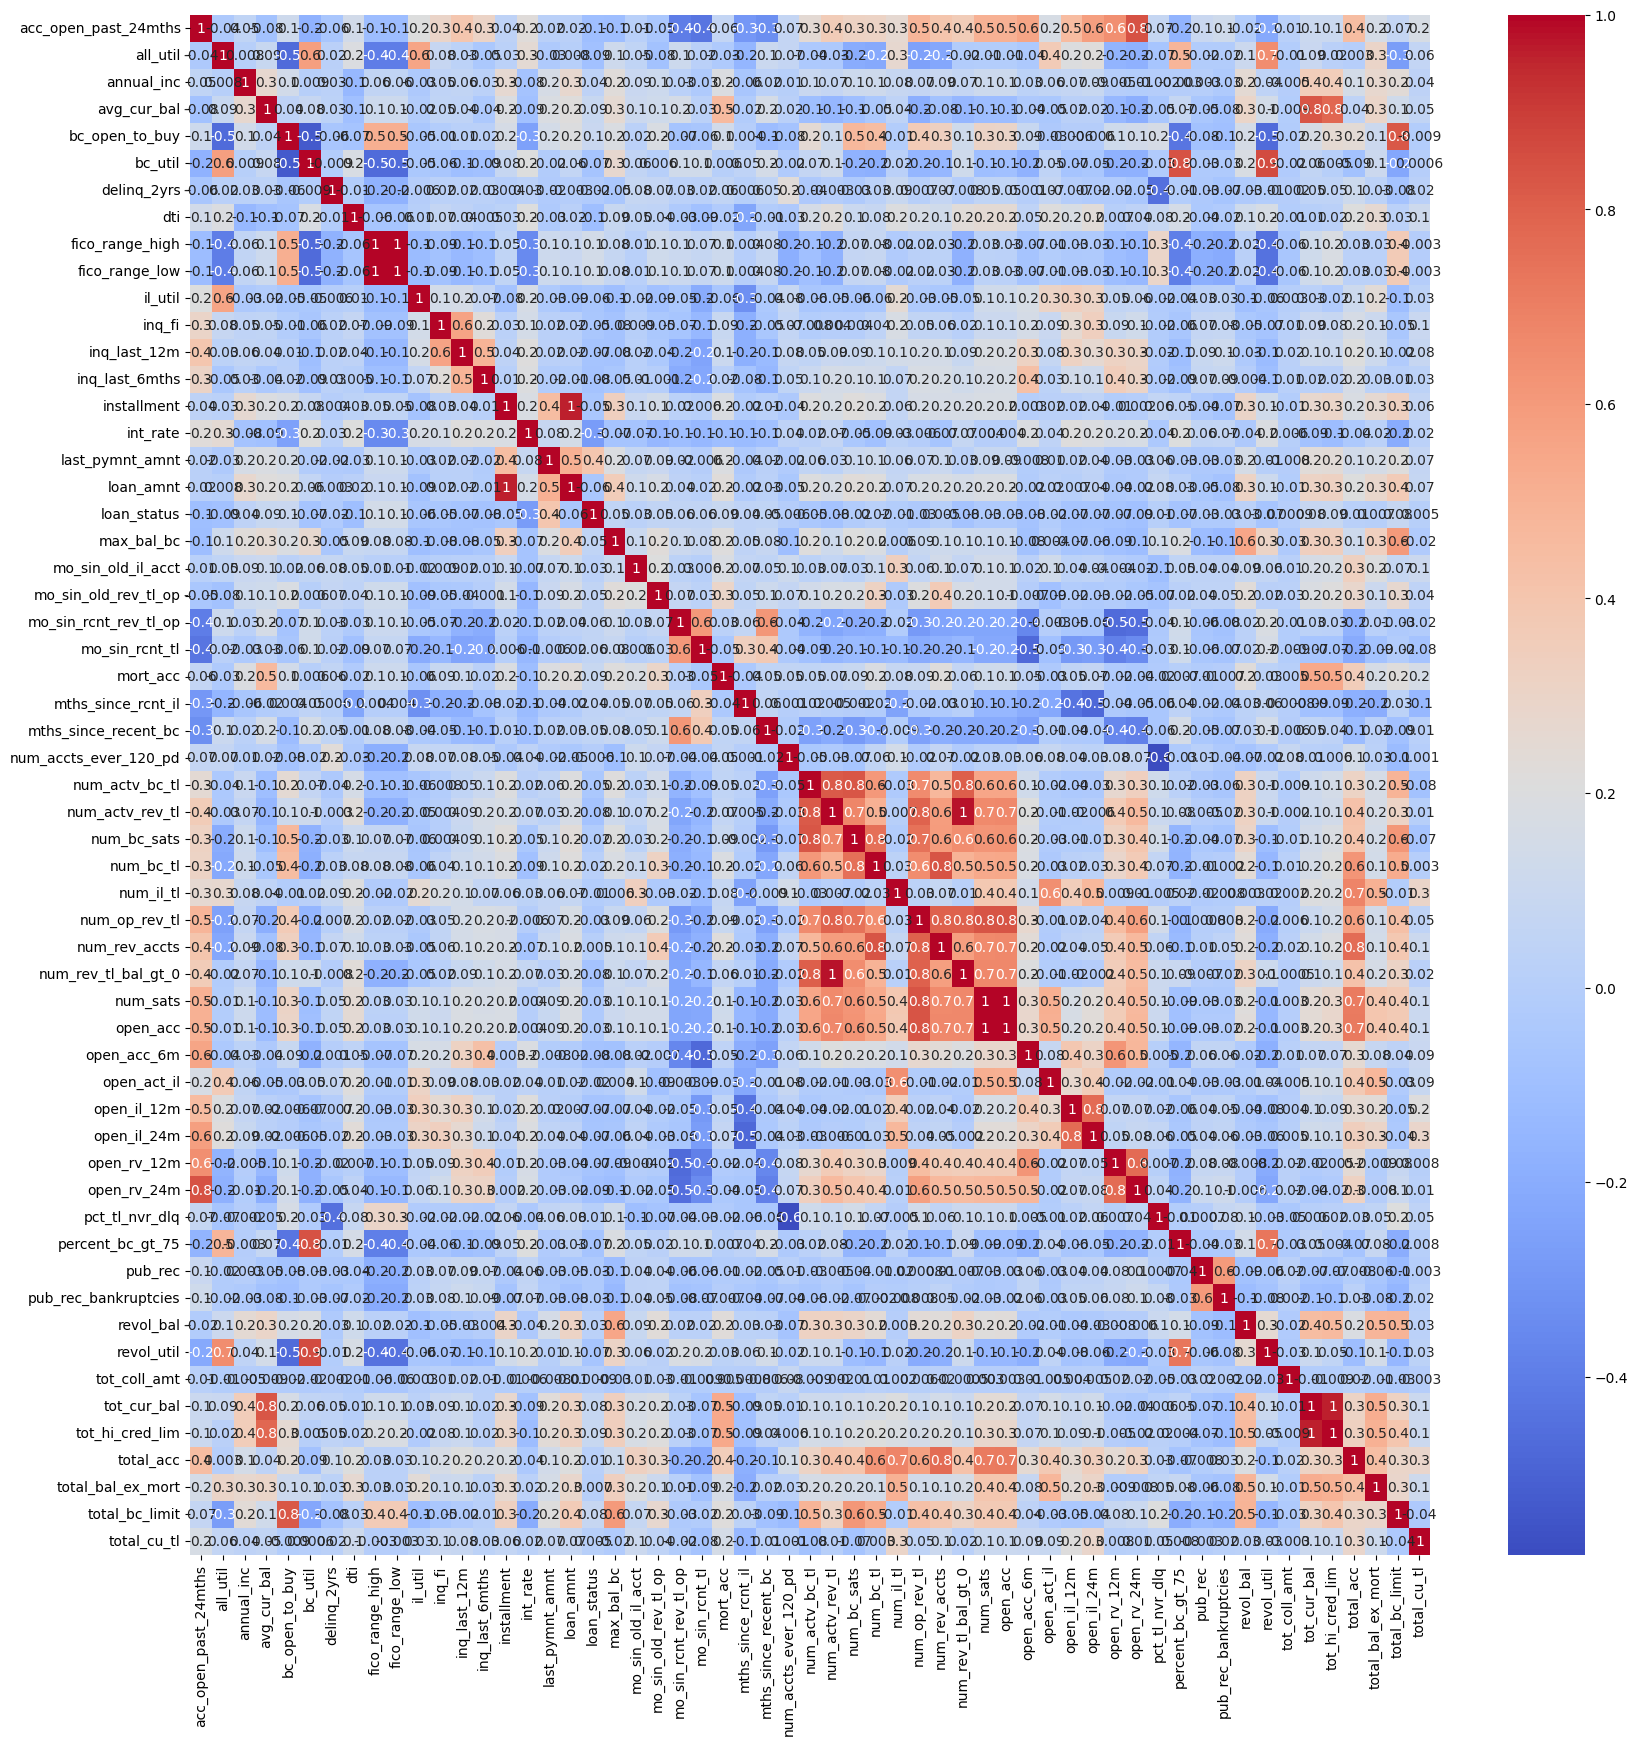

In [66]:
# find highly correlated features
corr = df_modified.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm')
plt.show()

# drop highly correlated features

In [70]:
# drop highly correlated features (corr > 0.7 and corr < 0.9) from df_modified

# get all nonnumeric columns in df_modified
nonnumeric_columns = df_modified.select_dtypes(exclude=[np.number]).columns
print(nonnumeric_columns)

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'initial_list_status', 'issue_d',
       'last_credit_pull_d', 'last_pymnt_d', 'purpose', 'sub_grade', 'term',
       'title', 'verification_status', 'zip_code'],
      dtype='object')


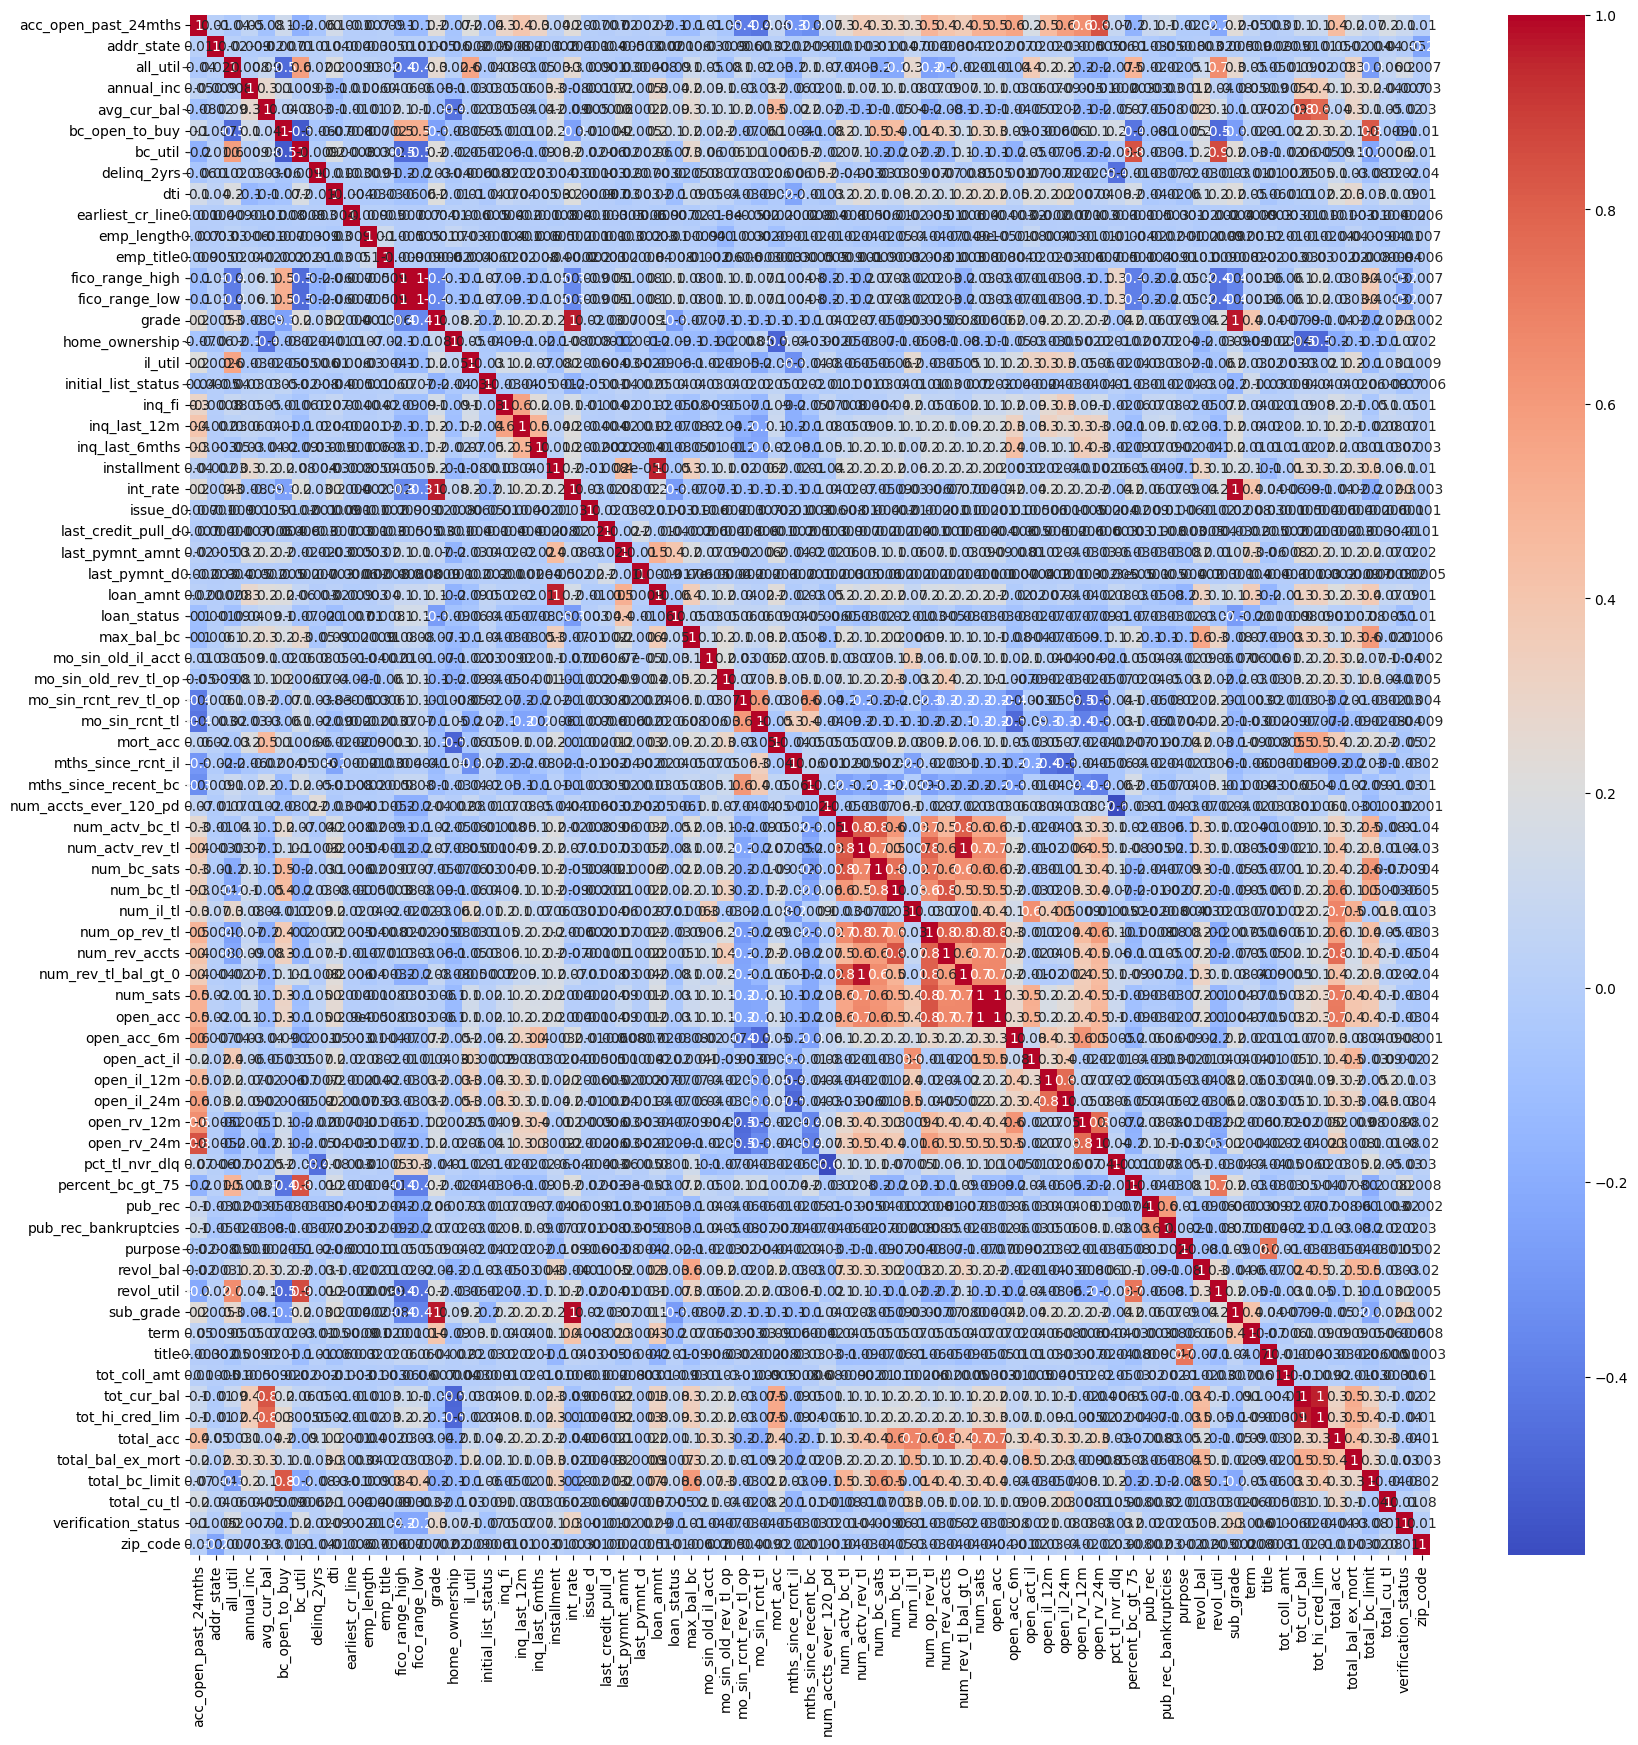

In [72]:
# convert all nonnumeric columns to category type in df_modified
for col in nonnumeric_columns:
    df_modified[col] = df_modified[col].astype('category').cat.codes

# show the correlation matrix for df_modified
corr = df_modified.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm')
plt.show()


